In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [86]:
def sigmoid(w,x):
    wtranspose=np.reshape(w,(len(w),1))
    wx=np.dot(wtranspose,x)
    s=1/(1+np.exp(-wx))
    return s

In [87]:
df = pd.read_csv (r'D:\Term6\Machine Learning\ML_HW2\Stress-Lysis.csv')
print(df)

      Humidity  Temperature  Step_count Stress_Level
0        21.33        90.33         123          mid
1        21.41        90.41          93          mid
2        27.12        96.12         196         high
3        27.64        96.64         177         high
4        10.87        79.87          87          low
...        ...          ...         ...          ...
1996     21.82        90.82          96          mid
1997     10.45        79.45          45          low
1998     27.22        96.22         135         high
1999     12.46        81.46          64          low
2000     16.87        85.87          50          mid

[2001 rows x 4 columns]


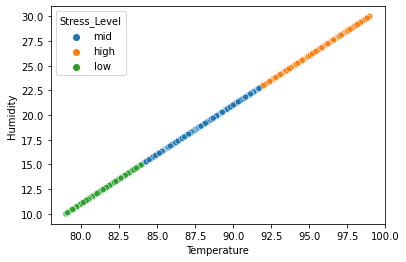

In [88]:
sns.scatterplot(x="Temperature", y="Humidity",hue="Stress_Level",data=df);

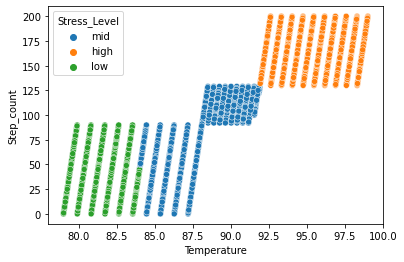

In [89]:
sns.scatterplot(x="Temperature", y="Step_count",hue="Stress_Level",data=df);

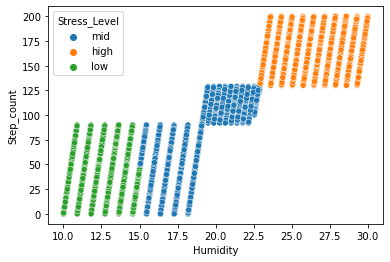

In [90]:
sns.scatterplot(x="Humidity", y="Step_count",hue="Stress_Level",data=df);

In [120]:
mask=np.random.rand(len(df))<=0.8
training_data=df[mask]
testing_data=df=df[~mask]
print(training_data)

      Humidity  Temperature  Step_count Stress_Level
4        10.87        79.87          87          low
14       28.06        97.06         148         high
15       19.43        88.43         123          mid
20       28.60        97.60         131         high
25       26.63        95.63         147         high
...        ...          ...         ...          ...
1987     18.08        87.08          80          mid
1993     12.05        81.05          23          low
1997     10.45        79.45          45          low
1998     27.22        96.22         135         high
1999     12.46        81.46          64          low

[319 rows x 4 columns]


In [131]:
temp=np.array(pd.Series.to_list((training_data["Temperature"])))
humid=np.array(pd.Series.to_list((training_data["Humidity"])))
x_train=np.vstack([temp,humid])

In [140]:
x_temp=x_train[:,1]
x_temp=np.reshape(x_temp,(len(x_temp),1))
print(x_temp)

[[97.06]
 [28.06]]


In [122]:
stress=np.array(pd.Series.to_list((training_data["Stress_Level"])))
yh_train=[]
for i in range(len(stress)):
    if (stress[i]=='high'):
        yh_train.append(1)
    else:
        yh_train.append(0)


In [135]:
w= np.random.randn(2,1)

In [136]:
print(w)

[[-2.05060535]
 [-0.30445383]]


In [127]:
def divit(n,x,w,y):
    w_t=np.transpose(w)
    Sum=[[0][0]]
    for i in range(n):
        x_temp=x[:, i]
        x_temp=np.reshape(x_temp,(len(x_temp),1))
        y_temp=y[i]
        s=sigmoid(w,x_temp)
        ys=y_temp-s
        xys=x_temp*ys
        Sum=Sum+xys
    return Sum
        
        
    
        
        
        

In [128]:
eta = 0.001  
n_iterations = 10000
for i in range(n_iterations):
    w=w+eta*divit(len(x_train),x_train,w,yh_train)

ValueError: shapes (2,1) and (2,1) not aligned: 1 (dim 1) != 2 (dim 0)